In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import sys 
import os 

plt.style.use('./dune.mplstyle')


In [2]:
file='/global/cfs/cdirs/dune/users/lmlepin/2x2_neutron_prod/AmBe_in_mod0_debug/EDEPSIM/2x2_MyQGSP_BERT_ArHP_AmBe_1758947779_1_TIME_MOD.EDEPSIM.hdf5'
h5_file = h5py.File(file,'r') 
vertex = h5_file['vertices']
traj = h5_file['trajectories']
seg = h5_file['segments']
print(h5_file.keys())
print(f"Number of events: {len(vertex)}")

<KeysViewHDF5 ['segments', 'trajectories', 'vertices']>
Number of events: 250


In [3]:
capture_times = []
total_gamma_E = []
gamma_E = []
n_gammas = [] 

In [4]:


for ev in vertex['event_id']:
    my_vert = vertex[vertex['event_id']==ev]
    my_traj = traj[traj['event_id']==ev]
    capture_times.extend(my_traj[(my_traj['pdg_id']==1000180410) & (my_traj['start_process']==4) & (my_traj['start_subprocess']==131) ]['t_start'] - my_vert['t_event'])
    gamma_E.extend(my_traj[(my_traj['pdg_id']==22) & (my_traj['start_process']==4) & (my_traj['start_subprocess']==131)]['E_start'])
    n_gammas.append(len(my_traj[(my_traj['pdg_id']==22) & (my_traj['start_process']==4) & (my_traj['start_subprocess']==131)]['E_start']))
    total_gamma_E.append(np.sum(my_traj[(my_traj['pdg_id']==22) & (my_traj['start_process']==4) & (my_traj['start_subprocess']==131)]['E_start']))

    


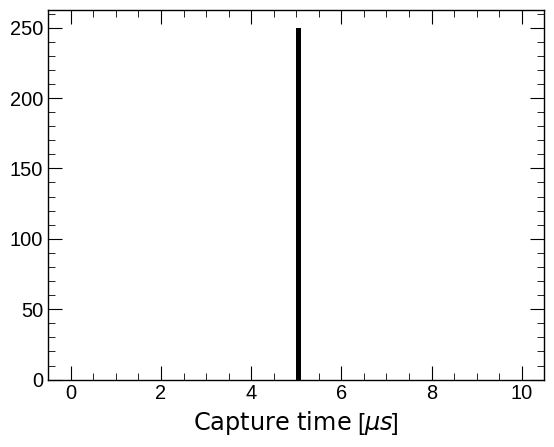

In [5]:
plt.hist(capture_times,bins=100,range=(0.,10.))
plt.xlabel(r'$\text{Capture time}$ [$\mu s$]')
plt.show()

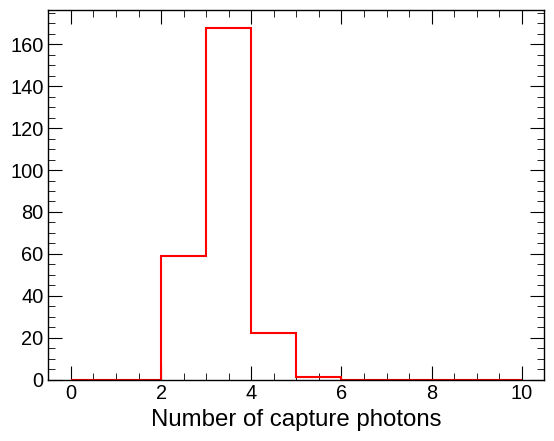

In [6]:
binning = np.linspace(0,10.,11)
plt.hist(n_gammas,bins=binning,histtype='step',color='red')
plt.xlabel('Number of capture photons')
plt.show()

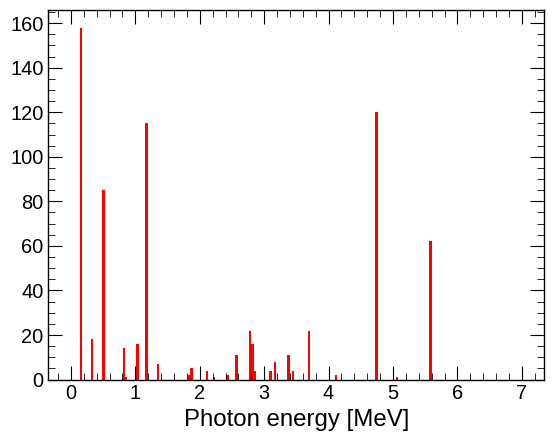

In [7]:
plt.hist(gamma_E,bins=200,range=(0.,7.),color='red')
plt.xlabel('Photon energy [MeV]')
plt.show()

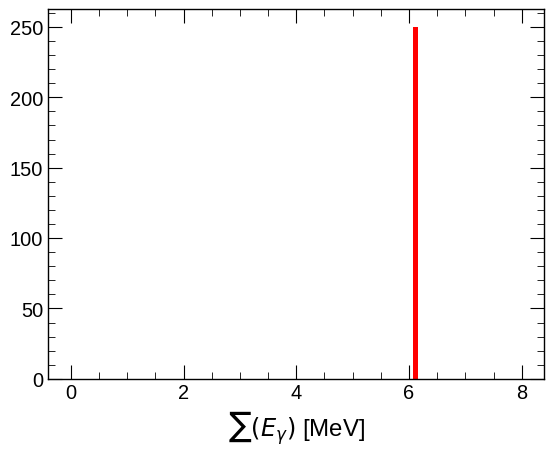

In [10]:
plt.hist(total_gamma_E,bins=100,range=(0.,8.),color='red')
plt.xlabel(r'$\sum(E_{\gamma})$ [MeV]')
plt.show()